**Univariate Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the Dataset**

In [ ]:
cars=pd.read_csv("cars_ds_final.csv")

In [ ]:
cars.shape

(1276, 141)

In [ ]:
cars.head()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Columns: 141 entries, Unnamed: 0 to Electric_Range
dtypes: float64(6), int64(1), object(134)
memory usage: 1.4+ MB


In [ ]:
cars.rename(columns=str.lower,inplace=True)

In [ ]:
cars.columns

Index(['unnamed: 0', 'make', 'model', 'variant', 'ex-showroom_price',
       'displacement', 'cylinders', 'valves_per_cylinder', 'drivetrain',
       'cylinder_configuration',
       ...
       'leather_wrapped_steering', 'automatic_headlamps', 'engine_type',
       'asr_/_traction_control', 'cruise_control', 'usb_ports',
       'heads-up_display', 'welcome_lights', 'battery', 'electric_range'],
      dtype='object', length=141)

In [ ]:
cars = cars[['make','model','ex-showroom_price','body_type','displacement', 'cylinders', 'fuel_system', 'fuel_tank_capacity', 'fuel_type',  'city_mileage',  'seating_capacity','basic_warranty', 'child_safety_locks', 'number_of_airbags', 'parking_assistance',  'navigation_system']]

In [ ]:
cars.shape

(1276, 16)

In [ ]:
cars.head()

,make,model,ex-showroom_price,body_type,displacement,cylinders,fuel_system,fuel_tank_capacity,fuel_type,city_mileage,seating_capacity,basic_warranty,child_safety_locks,number_of_airbags,parking_assistance,navigation_system
0,Tata,Nano Genx,"Rs. 2,92,667",Hatchback,624 cc,2.0,Injection,24 litres,Petrol,?23.6 km/litre,4.0,2 years /75000 Kms (years/distance whichever c...,Yes,NaN,NaN,NaN
1,Tata,Nano Genx,"Rs. 2,36,447",Hatchback,624 cc,2.0,Injection,24 litres,Petrol,?23.6 km/litre,4.0,2 years /75000 Kms (years/distance whichever c...,Yes,NaN,NaN,NaN
2,Tata,Nano Genx,"Rs. 2,96,661",Hatchback,624 cc,2.0,Injection,15 litres,CNG,NaN,4.0,2 years /75000 Kms (years/distance whichever c...,Yes,NaN,NaN,NaN
3,Tata,Nano Genx,"Rs. 3,34,768",Hatchback,624 cc,2.0,Injection,24 litres,Petrol,?23.6 km/litre,4.0,2 years /75000 Kms (years/distance whichever c...,Yes,NaN,NaN,NaN
4,Tata,Nano Genx,"Rs. 2,72,223",Hatchback,624 cc,2.0,Injection,24 litres,Petrol,?23.6 km/litre,4.0,2 years /75000 Kms (years/distance whichever c...,Yes,NaN,NaN,NaN


In [ ]:
cars.isnull().sum()

make                   75
model                   0
ex-showroom_price       0
body_type               6
displacement           12
cylinders              66
fuel_system             8
fuel_tank_capacity     69
fuel_type               0
city_mileage          555
seating_capacity        6
basic_warranty        440
child_safety_locks     75
number_of_airbags     135
parking_assistance    290
navigation_system     593
dtype: int64

In [ ]:
cars=cars.rename(columns={'make':'company','ex-showroom_price':'price'})

In [ ]:
cars.dtypes

company                object
model                  object
price                  object
body_type              object
displacement           object
cylinders             float64
fuel_system            object
fuel_tank_capacity     object
fuel_type              object
city_mileage           object
seating_capacity      float64
basic_warranty         object
child_safety_locks     object
number_of_airbags     float64
parking_assistance     object
navigation_system      object
dtype: object

**Company Attribute**

In [ ]:
cars['company'].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', nan, 'Dc', 'Mini',
       'Volvo', 'Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus',
       'Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin',
       'Bugatti', 'Bajaj', 'Icml', 'Force', 'Mg', 'Kia',
       'Land Rover Rover', 'Mitsubishi', 'Maruti Suzuki R'], dtype=object)

In [ ]:
cars['company'].isnull().value_counts()

False    1201
True       75
Name: company, dtype: int64

In [ ]:
cars=cars.dropna(subset=['company'])

In [ ]:
cars['company'].isnull().value_counts()

False    1201
Name: company, dtype: int64

**Model Attribute**

In [ ]:
cars['model'].isnull().sum()

0

**Price Attribute**

In [ ]:
cars['price'].isnull().sum()

0

In [ ]:
cars['price'].dtypes

dtype('O')

In [ ]:
cars['price'] = cars['price'].str.replace('Rs.', '')
cars['price']

<ipython-input-85-6b2a8300c3d2>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  cars['price'] = cars['price'].str.replace('Rs.', '')


0         2,92,667
1         2,36,447
2         2,96,661
3         3,34,768
4         2,72,223
           ...    
1271     13,02,000
1272     14,21,000
1273     14,31,000
1274     12,01,000
1275     68,62,560
Name: price, Length: 1201, dtype: object

In [ ]:
cars['price'] = cars['price'].str.replace(',', '')
cars['price'] = cars['price'].astype(int)
cars['price']

0        292667
1        236447
2        296661
3        334768
4        272223
         ...   
1271    1302000
1272    1421000
1273    1431000
1274    1201000
1275    6862560
Name: price, Length: 1201, dtype: int64

**Displacement Attribute**

In [ ]:
cars.displacement.isnull().sum()

11

In [ ]:
cars=cars.dropna(subset=['displacement'])

**Cylinder Attribute**

In [ ]:
cars.cylinders.info

<bound method Series.info of 0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
1271    4.0
1272    4.0
1273    4.0
1274    4.0
1275    4.0
Name: cylinders, Length: 1190, dtype: float64>

In [ ]:
cars.cylinders.isnull().sum()

55

In [ ]:
cars['cylinders']=cars['cylinders'].replace(np.nan,cars.cylinders.median())

In [ ]:
cars['cylinders'] = cars['cylinders'].astype(int)

**Fuel System Attribute**

In [ ]:
cars.fuel_system.info

<bound method Series.info of 0       Injection
1       Injection
2       Injection
3       Injection
4       Injection
          ...    
1271    Injection
1272    Injection
1273    Injection
1274    Injection
1275    Injection
Name: fuel_system, Length: 1190, dtype: object>

In [ ]:
cars.fuel_system.unique()

array(['Injection', 'PGM - Fi', nan], dtype=object)

In [ ]:
cars['fuel_tank_capacity']=cars.fuel_tank_capacity.str.strip('litres')

In [ ]:
cars['fuel_tank_capacity']=cars['fuel_tank_capacity'].replace(np.nan,cars.cylinders.median())

In [ ]:
cars['fuel_tank_capacity'] = cars['fuel_tank_capacity'].astype(float)

 **Mileage Attribute**

In [ ]:
cars.city_mileage.info

<bound method Series.info of 0       ?23.6 km/litre
1       ?23.6 km/litre
2                  NaN
3       ?23.6 km/litre
4       ?23.6 km/litre
             ...      
1271     22.6 km/litre
1272     22.6 km/litre
1273       18 km/litre
1274     14.3 km/litre
1275     8.25 km/litre
Name: city_mileage, Length: 1190, dtype: object>

In [ ]:
cars['city_mileage'] = cars['city_mileage'].str.replace('?',' ')
cars['city_mileage']=cars['city_mileage'].str.strip('km/litre')
cars['city_mileage']=cars['city_mileage'].str.replace(',','.')

<ipython-input-101-8710b9d33754>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cars['city_mileage'] = cars['city_mileage'].str.replace('?',' ')


In [ ]:
cars['city_mileage']=cars['city_mileage'].str.replace('12.5-12.7 ','12.5')

<ipython-input-102-85c223034266>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  cars['city_mileage']=cars['city_mileage'].str.replace('12.5-12.7 ','12.5')


In [ ]:
cars['city_mileage']=cars['city_mileage'].astype(float)
cars['city_mileage']=cars['city_mileage'].replace(np.nan,cars.city_mileage.median())
cars['city_mileage']

0       23.60
1       23.60
2       15.50
3       23.60
4       23.60
        ...  
1271    22.60
1272    22.60
1273    18.00
1274    14.30
1275     8.25
Name: city_mileage, Length: 1190, dtype: float64

**Seating Capacity Attribute**

In [ ]:
cars['seating_capacity']

0       4.0
1       4.0
2       4.0
3       4.0
4       4.0
       ... 
1271    5.0
1272    5.0
1273    5.0
1274    5.0
1275    7.0
Name: seating_capacity, Length: 1190, dtype: float64

In [ ]:
cars['seating_capacity'].isnull().sum()
cars['seating_capacity']=cars['seating_capacity'].replace(np.nan,cars.seating_capacity.median())
cars['seating_capacity']=cars['seating_capacity'].astype(int)

**Airbag Attribute**

In [ ]:
cars.number_of_airbags.unique()

array([nan,  1.,  2.,  4.,  6.,  9.,  8.,  7., 10.,  5.,  3., 14.])

In [ ]:
cars['number_of_airbags']=cars['number_of_airbags'].replace(np.nan,cars.number_of_airbags.median())
cars['number_of_airbags']=cars['number_of_airbags'].astype(int)
cars.parking_assistance.info

<bound method Series.info of 0                                      NaN
1                                      NaN
2                                      NaN
3                                      NaN
4                                      NaN
                       ...                
1271    Front and rear sensors with camera
1272              Rear sensors with camera
1273              Rear sensors with camera
1274    Front and rear sensors with camera
1275              Rear sensors with camera
Name: parking_assistance, Length: 1190, dtype: object>

**Parking Assisstance**

In [ ]:
cars.parking_assistance.isnull().sum()

285

In [ ]:
cars['parking_assistance']=cars['parking_assistance'].replace(np.nan,'No')
cars.child_safety_locks

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
1271    Yes
1272    Yes
1273    Yes
1274    Yes
1275    Yes
Name: child_safety_locks, Length: 1190, dtype: object

**Child Safety Attribute**

In [ ]:
cars.child_safety_locks.isnull().sum()
cars.child_safety_locks.unique()

array(['Yes', nan], dtype=object)

In [ ]:
cars['child_safety_locks']=cars['child_safety_locks'].replace(np.nan,'No')

**Navigation System Attribute**

In [ ]:
cars.navigation_system.info

<bound method Series.info of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1271    Yes
1272    Yes
1273    Yes
1274    Yes
1275    Yes
Name: navigation_system, Length: 1190, dtype: object>

In [ ]:
cars['navigation_system']=cars['navigation_system'].replace(np.nan,'No')
cars.basic_warranty.unique()

array(['2 years /75000 Kms (years/distance whichever comes first)',
       '2 years / Unlimited Kms',
       '2 Years / 50,000 Kms (Whichever comes earlier)', nan,
       '2 years /40000 Kms (years/distance whichever comes first)',
       '2 Years / 75,000 KM (whichever is earlier)',
       '3 years /100000 Kms (years/distance whichever comes first)',
       '24 months /50000 Kms (whichever comes first)',
       '2 Years / 100,000 Kms (whichever comes first)',
       '3 Years/1,00,000 Kms (Whichever comes earlier)',
       '2 Years / 40,000 Kms (Whichever comes earlier)',
       '3 years / Unlimited Kms',
       '3 Years / 100000 km (whichever comes first)',
       '2 Years Unlimited Kilometres', '3 years/40,000 km',
       '2 Years Warranty',
       '4 years / 80000 Kms (years/distance whichever comes first)',
       '2 years /1,00,000 Kms (years/distance whichever comes first)',
       '3 years/1 lakh kms (whichever is earlier)',
       '3 years / 100,000 Kms',
       '2 years /50000

**Warranty Attribute**

In [ ]:
cars['basic_warranty']=cars['basic_warranty'].str.split('Years').str[0].str.strip()
cars['basic_warranty']=cars['basic_warranty'].str.extract('(\d+)').astype(float)
cars.basic_warranty.isnull().sum()

415

In [ ]:
cars['basic_warranty']=cars['basic_warranty'].replace(np.nan,cars.basic_warranty.median())
cars['basic_warranty']=cars['basic_warranty'].astype(int)

In [ ]:
cars.head()

,company,model,price,body_type,displacement,cylinders,fuel_system,fuel_tank_capacity,fuel_type,city_mileage,seating_capacity,basic_warranty,child_safety_locks,number_of_airbags,parking_assistance,navigation_system
0,Tata,Nano Genx,292667,Hatchback,624 cc,2,Injection,24.0,Petrol,23.6,4,2,Yes,2,No,No
1,Tata,Nano Genx,236447,Hatchback,624 cc,2,Injection,24.0,Petrol,23.6,4,2,Yes,2,No,No
2,Tata,Nano Genx,296661,Hatchback,624 cc,2,Injection,15.0,CNG,15.5,4,2,Yes,2,No,No
3,Tata,Nano Genx,334768,Hatchback,624 cc,2,Injection,24.0,Petrol,23.6,4,2,Yes,2,No,No
4,Tata,Nano Genx,272223,Hatchback,624 cc,2,Injection,24.0,Petrol,23.6,4,2,Yes,2,No,No


In [ ]:
cars.company.value_counts()

Maruti Suzuki       149
Hyundai             129
Mahindra            117
Tata                 94
Toyota               82
Honda                64
Skoda                43
Ford                 43
Bmw                  37
Renault              36
Volkswagen           34
Audi                 31
Nissan               29
Jeep                 28
Land Rover Rover     27
Fiat                 23
Jaguar               22
Kia                  21
Volvo                18
Datsun               15
Porsche              14
Maruti Suzuki R      14
Lamborghini          13
Mg                   11
Icml                 11
Land Rover           10
Lexus                10
Mini                 10
Maserati              9
Ferrari               8
Mitsubishi            7
Premier               6
Bentley               6
Force                 6
Isuzu                 5
Aston Martin          3
Bajaj                 2
Bugatti               2
Dc                    1
Name: company, dtype: int64

**Plotting Section**

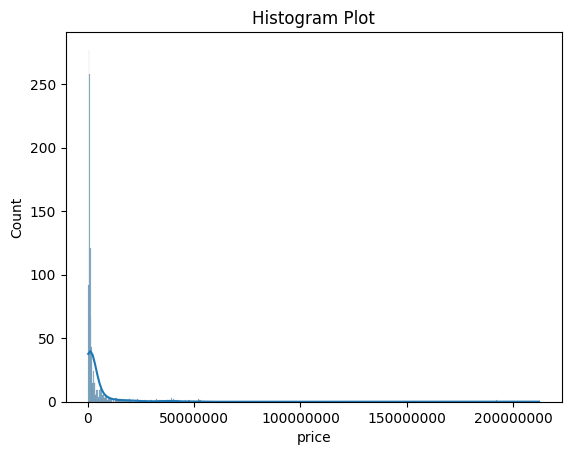

In [ ]:
plt.ticklabel_format(style='plain')
sns.histplot(cars['price'], kde=True)
plt.xlabel('price')
plt.title('Histogram Plot')
plt.show()

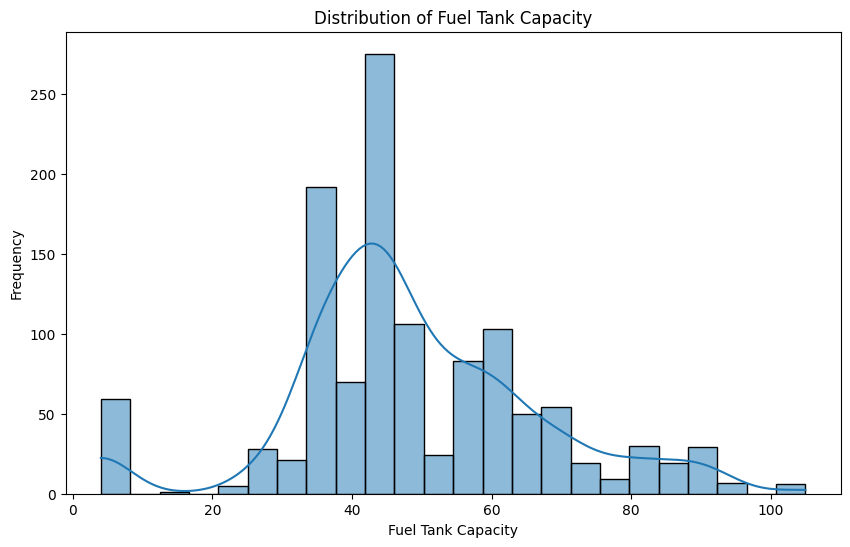

In [ ]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(cars['fuel_tank_capacity'], kde=True)
plt.title('Distribution of Fuel Tank Capacity')
plt.xlabel('Fuel Tank Capacity')
plt.ylabel('Frequency')
plt.show()

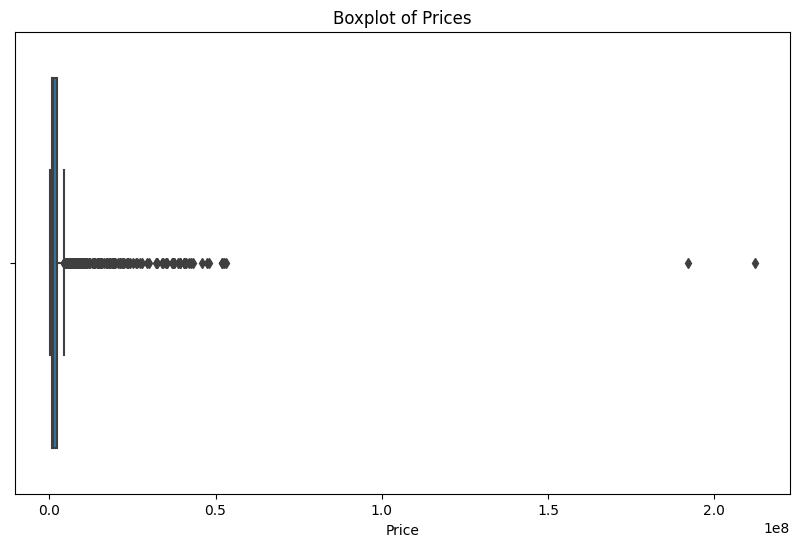

In [ ]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=cars['price'])
plt.title('Boxplot of Prices')
plt.xlabel('Price')
plt.show()

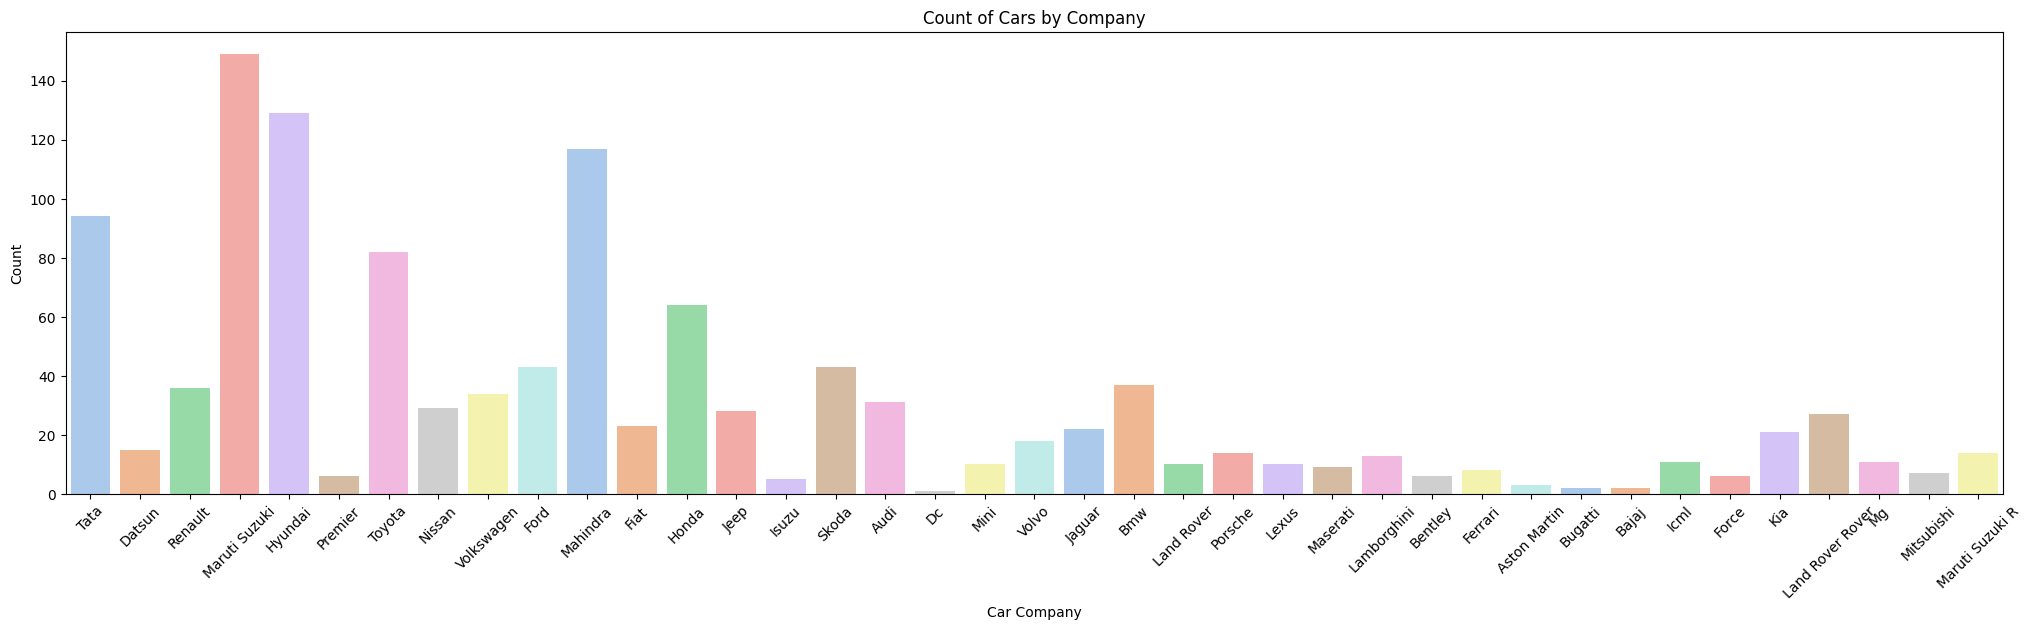

In [ ]:
plt.figure(figsize=(25, 6))
sns.countplot(x='company', data=cars, palette='pastel')
plt.title('Count of Cars by Company')
plt.xlabel('Car Company')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Bivariate Analysis**

<ipython-input-124-385202db4a22>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cars.corr()


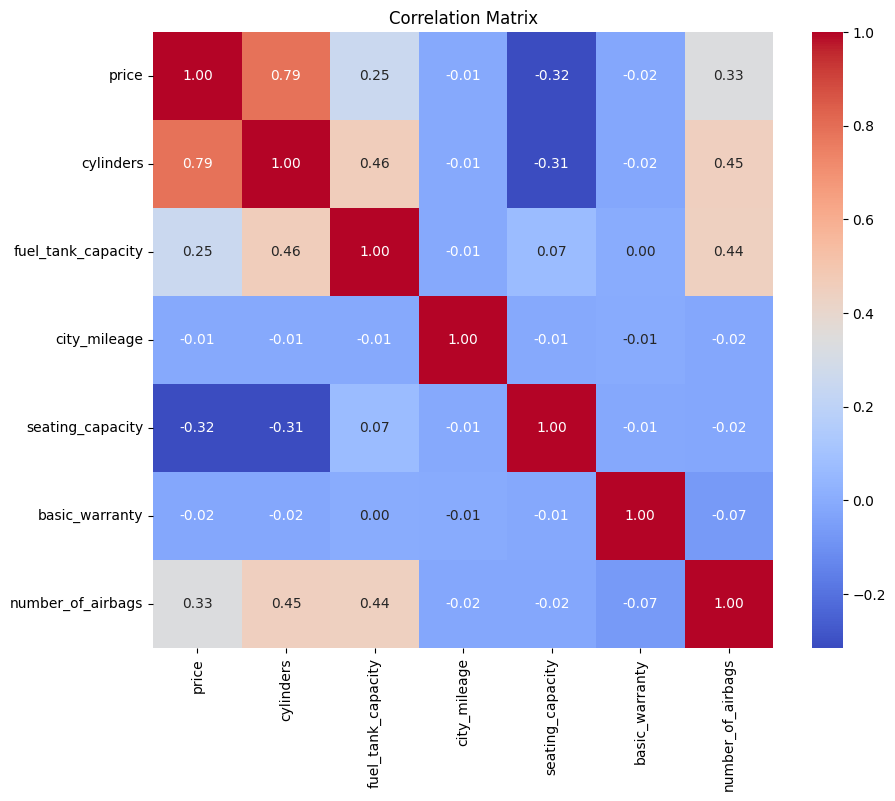

In [ ]:
correlation_matrix = cars.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

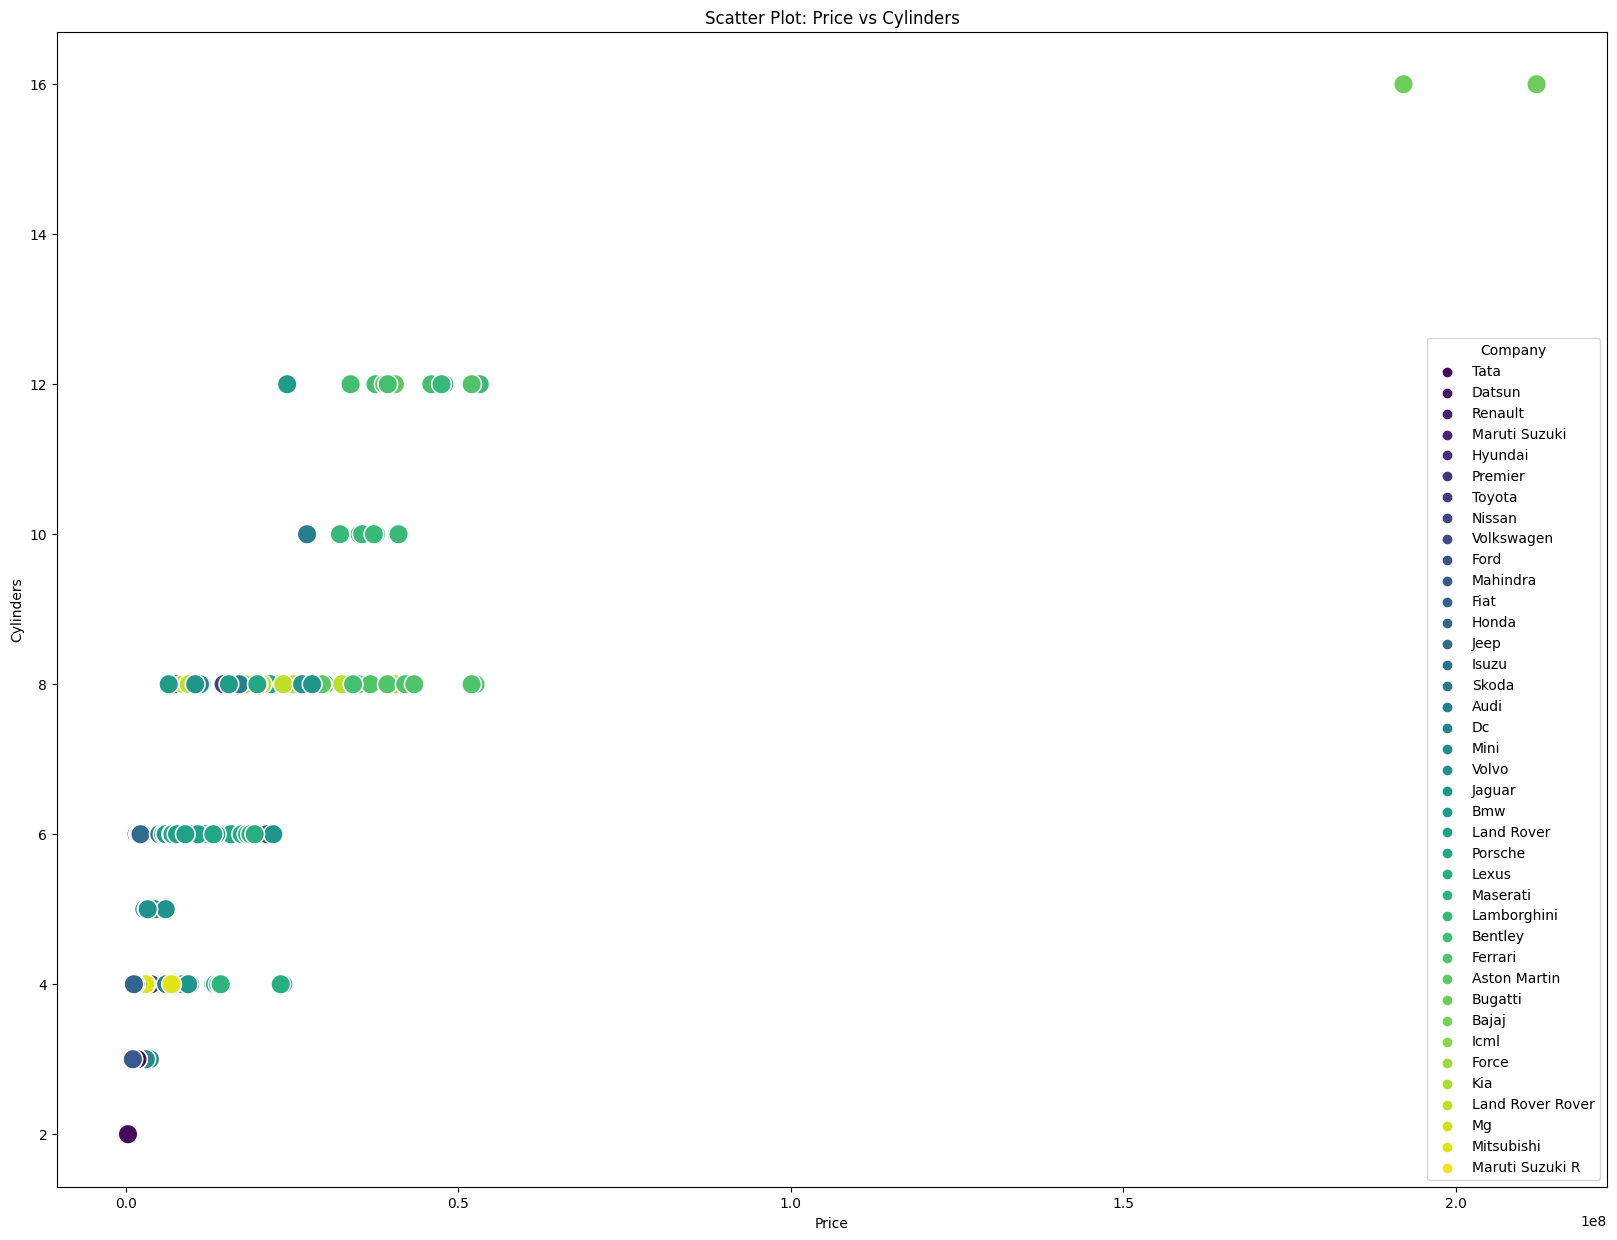

In [ ]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x='price', y='cylinders', data=cars, hue='company', palette='viridis', s=200)
plt.title('Scatter Plot: Price vs Cylinders')
plt.xlabel('Price')
plt.ylabel('Cylinders')
plt.legend(title='Company')
plt.show()

In [ ]:
plt.figure(figsize=(28, 8))
sns.lineplot(x='Company', y='price', hue='body_type', data=cars, palette='Set2')
plt.title('Line Plot: Price by Company with Body Type')
plt.xlabel('Company')
plt.ylabel('Price')
plt.legend(title='Body Type')
plt.show()